C:\Users\PC\AppData\Local\Temp\ipykernel_4280\2206650927.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  classes = [row[-1] for row in neighbors]  # Poslednja kolona predstavlja ciljnu promenljivu 'LUNG_CANCER'


Vrednost predikcije: 2
Novi podatak [99, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1] pripada klasi: 2


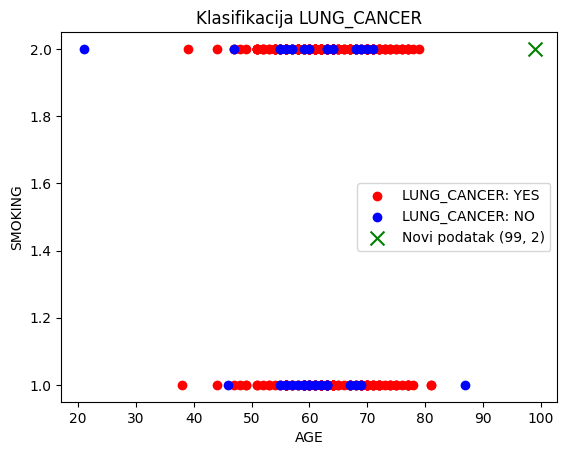

In [3]:
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje podataka
data = pd.read_csv('datasets/cancer.csv')
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0})  # 'M' -> 1, 'F' -> 0
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})  # 'YES' -> 1, 'NO' -> 0

# Novi podatak za klasifikaciju
new_data =  [99,2,2,2,2,2,2,1,2,1,2,2,1,1,1]

# Određivanje vrednosti za K
K = int(sqrt(len(data)))

# Funkcija za izračunavanje euklidske udaljenosti između dva podatka
def Euclidean_distance(first, second):
    return sqrt(sum((a - b) ** 2 for a, b in zip(first, second)))

# Konverzija string vrednosti u numeričke vrednosti
data = data.apply(pd.to_numeric)

# Funkcija za pronalaženje K najbližih suseda
def Get_Neighbors(data, new_data, k):
    distances = [(row[:-1], Euclidean_distance(new_data, row[:-1])) for _, row in data.iterrows()]
    distances.sort(key=lambda x: x[1])
    neighbors = [row for row, _ in distances[:k]]
    return neighbors

# Funkcija za predikciju klase novog podatka
def predict_classification(data, new_data, k):
    neighbors = Get_Neighbors(data, new_data, k)
    classes = [row[-1] for row in neighbors]  # Poslednja kolona predstavlja ciljnu promenljivu 'LUNG_CANCER'
    prediction = max(set(classes), key=classes.count)
    print(f"Vrednost predikcije: {prediction}")  # Dodato ispisivanje predikcije
    return prediction

# Prikaz rezultata
prediction = predict_classification(data, new_data, K)
print(f"Novi podatak {new_data} pripada klasi: {prediction}")

# Prikazivanje podataka na grafiku
colors = {'YES': 'red', 'NO': 'blue'}  # Prilagodite boje klasama u svom datasetu
plt.scatter(data[data['LUNG_CANCER'] == 1]['AGE'], data[data['LUNG_CANCER'] == 1]['SMOKING'], c='red', label='LUNG_CANCER: YES')
plt.scatter(data[data['LUNG_CANCER'] == 0]['AGE'], data[data['LUNG_CANCER'] == 0]['SMOKING'], c='blue', label='LUNG_CANCER: NO')
plt.scatter(new_data[0], new_data[1], c='green', marker='x', s=100, label=f'Novi podatak ({new_data[0]}, {new_data[1]})')
plt.xlabel('AGE')
plt.ylabel('SMOKING')
plt.title('Klasifikacija LUNG_CANCER')
plt.legend()
plt.show()
